## Bank Customer Churn Project
The problem is that the bank want to know which customers are going to leave the bank from three country "Germany, France & Spain" The dataset is taken from kaggle and performed all the steps requires for a end to end data science project. Getting started with exploratory data analysis it's ended up with feature engineering and Machine learning. For this task "Random Forest Classifier" & "XGBoost Classifier" algorithm is used and finally for evaluation the performance visually "XGBoost is taken in consideration. The notebook ended up with and accuracy score of 86.4%

Dataset Link: https://www.kaggle.com/santoshd3/bank-customers

In [1]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# set style for the plots
sns.set_theme(style="darkgrid")
sns.set_palette("Set2")

In [2]:
# importing the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head() # see the top 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# viewing last 5 rows of the dataset
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
# checking the shape of data
df.shape

(10000, 14)

We've 10000 rown and 14 columns in the dataset.

In [5]:
# View some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# let's see summary statistic
df.drop(['RowNumber', 'CustomerId'], axis = 1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


This table tells a lot. This tells about mean, standard deviation, minimum value, quartile values as well maximum value available in the dataset.

## EDA

In [7]:
# Now let's check if there is any null value
df.isnull().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

There is not null value in the dataset.

In [9]:
# check if there is any duplicate value
df.duplicated().sum()

0

No duplicated value found here.

0    7963
1    2037
Name: Exited, dtype: int64


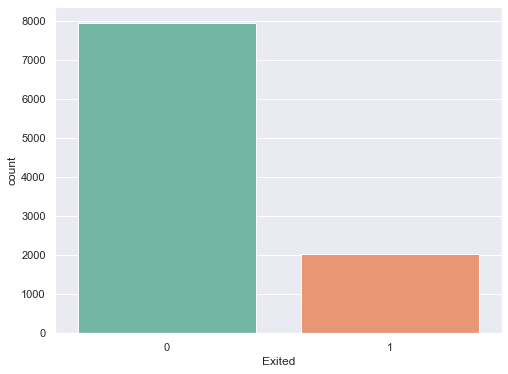

In [10]:
# First let's check how much customer has exited the bank

print(df['Exited'].value_counts())
# vislaize the number
plt.figure(figsize=(8,6))
sns.countplot(data = df, x  = 'Exited')
plt.show()

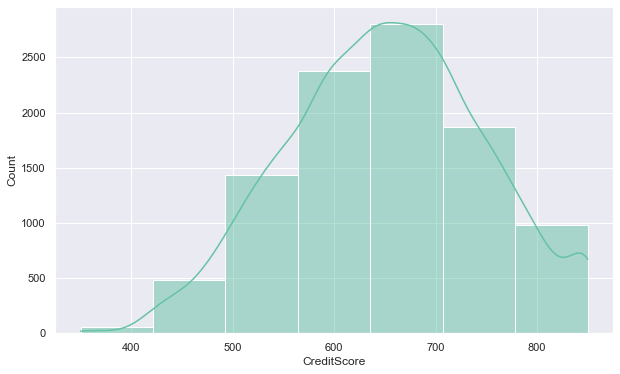

In [11]:
# first let's check for creditscore & how it is distributed 

plt.figure(figsize=(10,6))
sns.histplot(data = df, x  = 'CreditScore', bins = 7, kde= True)
plt.show()

The above histplot tells that the "Creadit Score" is almost normally distributed. and most of the customer has credit score more than 600 which is a great parameter for any bank.

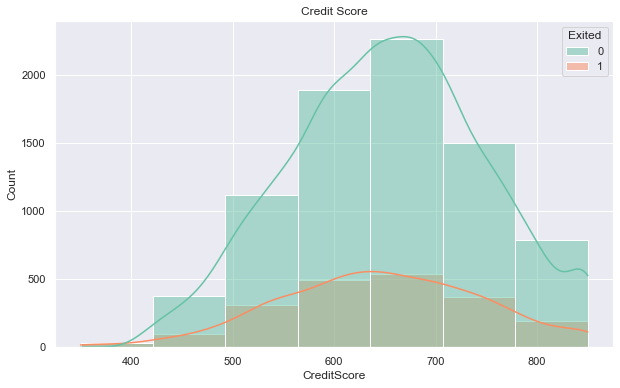

In [12]:
# let's see how this credit score related to our target variable

plt.figure(figsize=(10,6))
sns.histplot(data = df, x  = 'CreditScore', bins = 7, kde= True, hue = 'Exited')
plt.title('Credit Score')
plt.show()

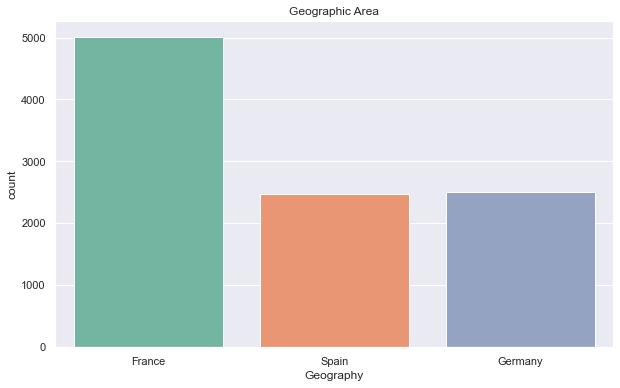

In [13]:
# Now let's use "Geography" and see which Geography area has how many customers

plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Geography')
plt.title('Geographic Area')
plt.show()

Here we can see that France has the highest number count which means that most of the clients are from France. Spain & Germany has almost same number of clients for this bank.

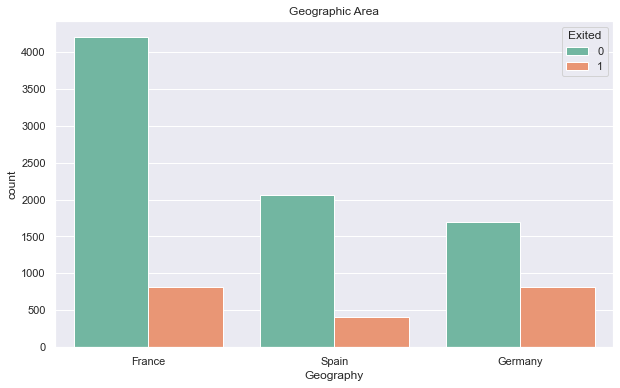

In [14]:
# Now let's use "Geography" and see which Geography area has maximum churn

plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Geography', hue = 'Exited')
plt.title('Geographic Area')
plt.show()

Though France has the highest number of clients but churn rate is very low compare to other countries Spain & Germany. And the highest exited is from Germany though it has low number of customer.

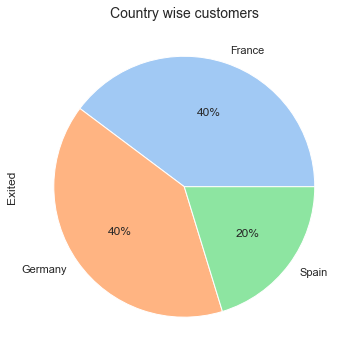

In [18]:
# let's use a pie plot to understand what percentage of client exited from which country

colors = sns.color_palette('pastel')[0:3]

plt.figure(figsize=(8,6)) 
df.groupby(['Geography'])['Exited'].sum().plot.pie(autopct='%.00f%%', colors = colors)
plt.title("Country wise customers", fontsize=14);

plt.show()

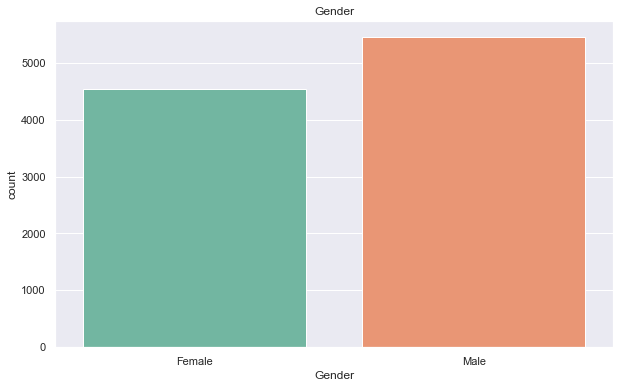

In [23]:
# Now let's see the "Gender" column and find most of the customers are either male or  female
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Gender')
plt.title('Gender')
plt.show()

Most of the customer are male here. Now let's check those male & females are from and they exited or not

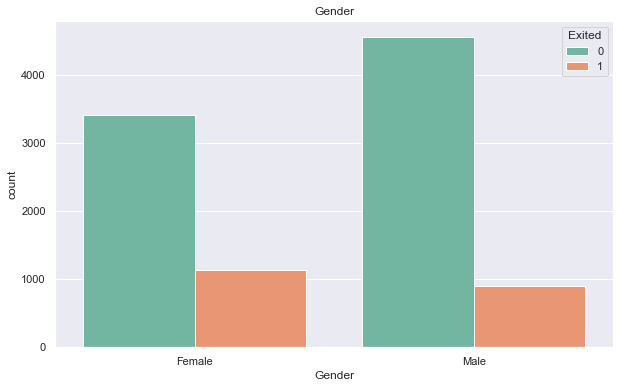

In [24]:
# Now let's see the "Gender" column and find most of the customers are either male or  female
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Gender', hue = 'Exited')
plt.title('Gender')
plt.show()

Interesting, Though there are more Male customer but their leaving rate is low comparing to the female customer.

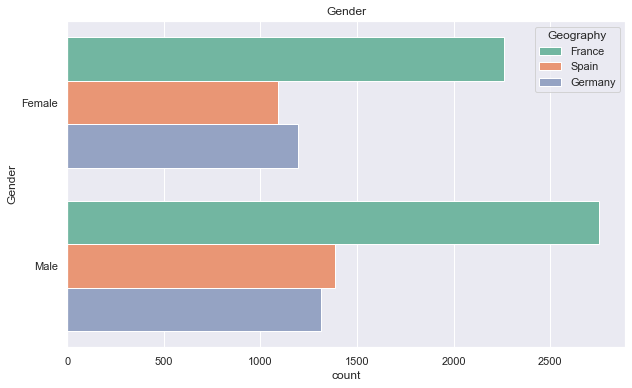

In [27]:
# Now let's see the "Gender" column and find most of the customers are either male or  female
plt.figure(figsize=(10,6))
sns.countplot(data = df, y = 'Gender', hue = 'Geography')
plt.title('Gender')
plt.show()

It's an ideal case since in France there are more clients then the number of both male & female customer must be high in there. and the same case for the other two country.

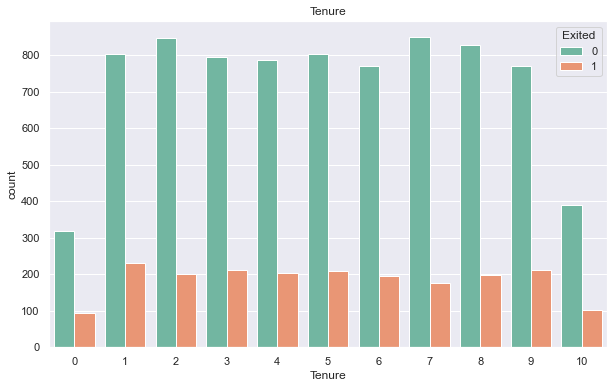

In [28]:
# Now let's inspect "Tenure" to understand  how much time most of the customer need to repay the loan.

plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Tenure', hue = 'Exited')
plt.title('Tenure')
plt.show()

Here, most of the clients take 1-9 years to repay the loan. which is Normal. After paying the loan approximate 200 clients exit the bank.

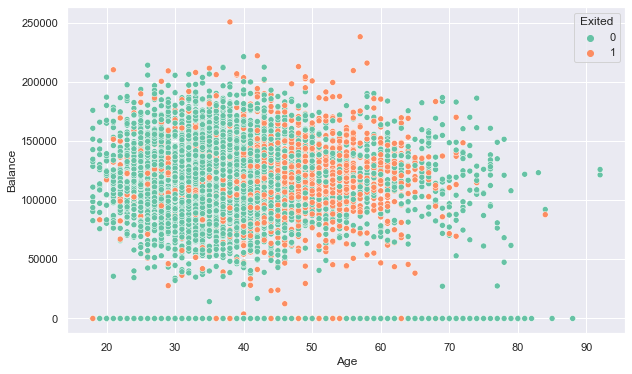

In [29]:
# Now let's check how the "Balance" is related to the "Age" of the clients

plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'Age', y = 'Balance', hue = 'Exited')
plt.show()

The above scatter plot gives an insights that as the age increase the clients exit the bank. Most of client exit the bank after they become 45 or 50 years old. There are some points that is below 40 years and severals are after 80 which may consider as outliers.

<Figure size 720x432 with 0 Axes>

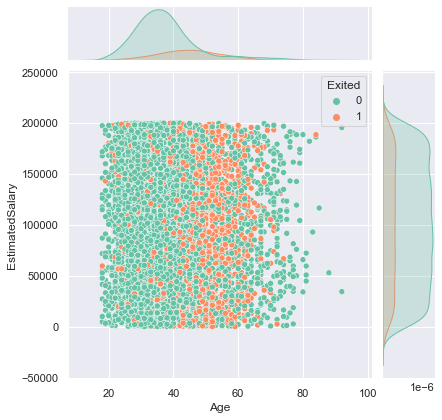

In [30]:
# Now let's check how the "Estimated Salary" is related to the "Age" of the clients

plt.figure(figsize=(10,6))
sns.jointplot(data = df, x = 'Age', y = 'EstimatedSalary', hue = 'Exited')
plt.show()

At the age of 45-60 their leaving rate is very high and their estimated salary range is layed 0 to 200000 and after 60 it drops that's logical because at that age many people quit their jobs.

<Figure size 720x432 with 0 Axes>

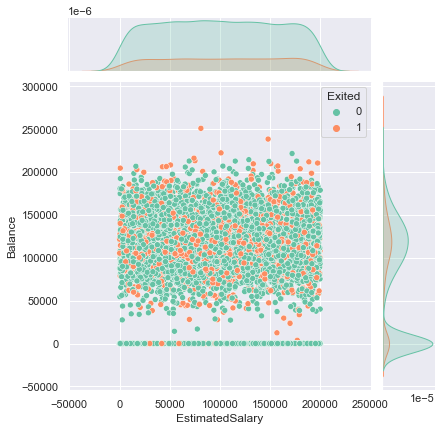

In [31]:
# Now Let's check the "Estimated Salary" and "Balance"

plt.figure(figsize=(10,6))
sns.jointplot(data = df, y = 'Balance', x = 'EstimatedSalary', hue = 'Exited')
plt.show()

Here we can see that when the estimated salary is between 50000 to 150000 their balance range is 50000 to 150000. Most of the cases are like that but there are some blance more than 200000 which can be consider as outliers.

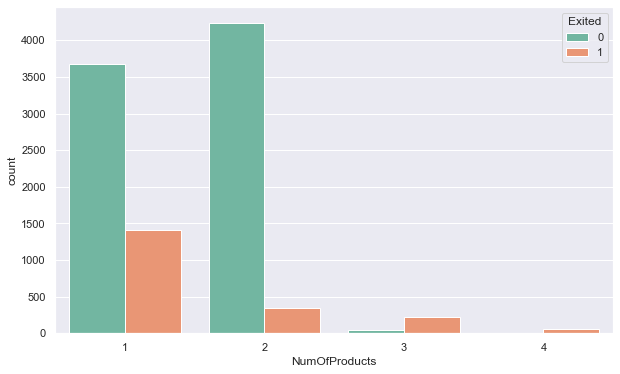

In [32]:
# For NumOfProducts: how many services the customer taking from the bank
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'NumOfProducts', hue = 'Exited')
plt.show()

The people who has only one service exit the bank most and those has multiple service their leaving ratio is very low.

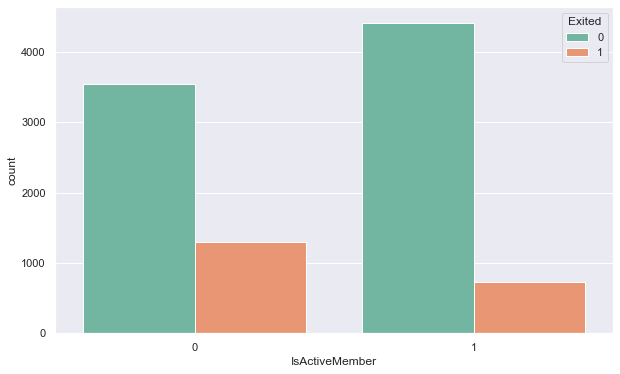

In [34]:
# check if the customer is an active member or not
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'IsActiveMember', hue = 'Exited')
plt.show()

The active members of the bank exit the bank very less than inactive clients.

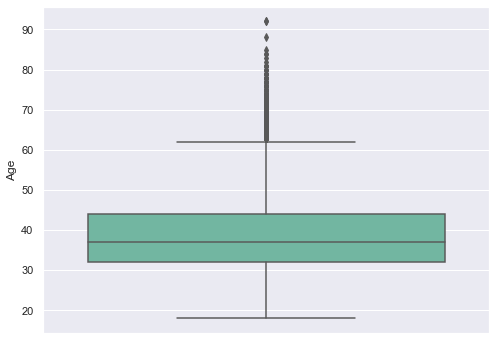

In [36]:
# Now let's check if there is any outlier in "CreditScore", "EstimatedSalary" "Balance", "Tenure ", "Age"

# For Age
plt.figure(figsize=(8,6))
sns.boxplot(data = df, y = "Age")
plt.show()

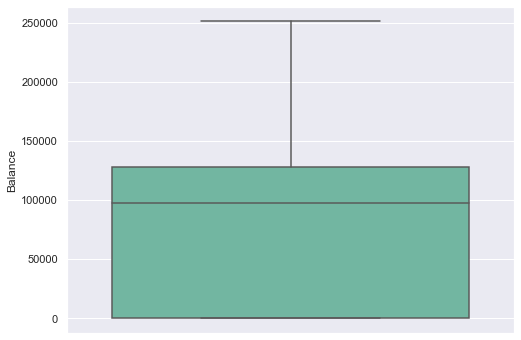

In [37]:
# For Balance
plt.figure(figsize=(8,6))
sns.boxplot(data = df, y = "Balance")
plt.show()

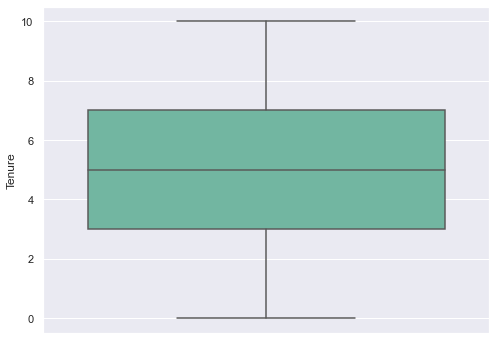

In [38]:
# For Tenure
plt.figure(figsize=(8,6))
sns.boxplot(data = df, y = "Tenure")
plt.show()

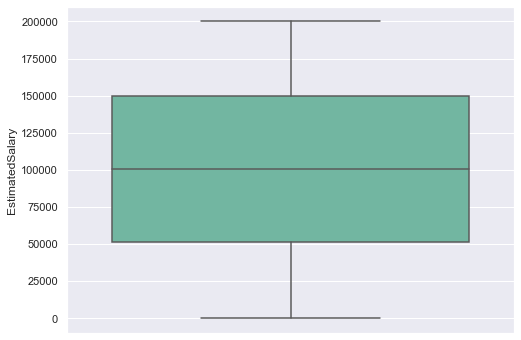

In [39]:
# For EstimatedSalary
plt.figure(figsize=(8,6))
sns.boxplot(data = df, y = "EstimatedSalary")
plt.show()

From the above plots, there are some outliers in 'Age' & 'CreditScore' columns

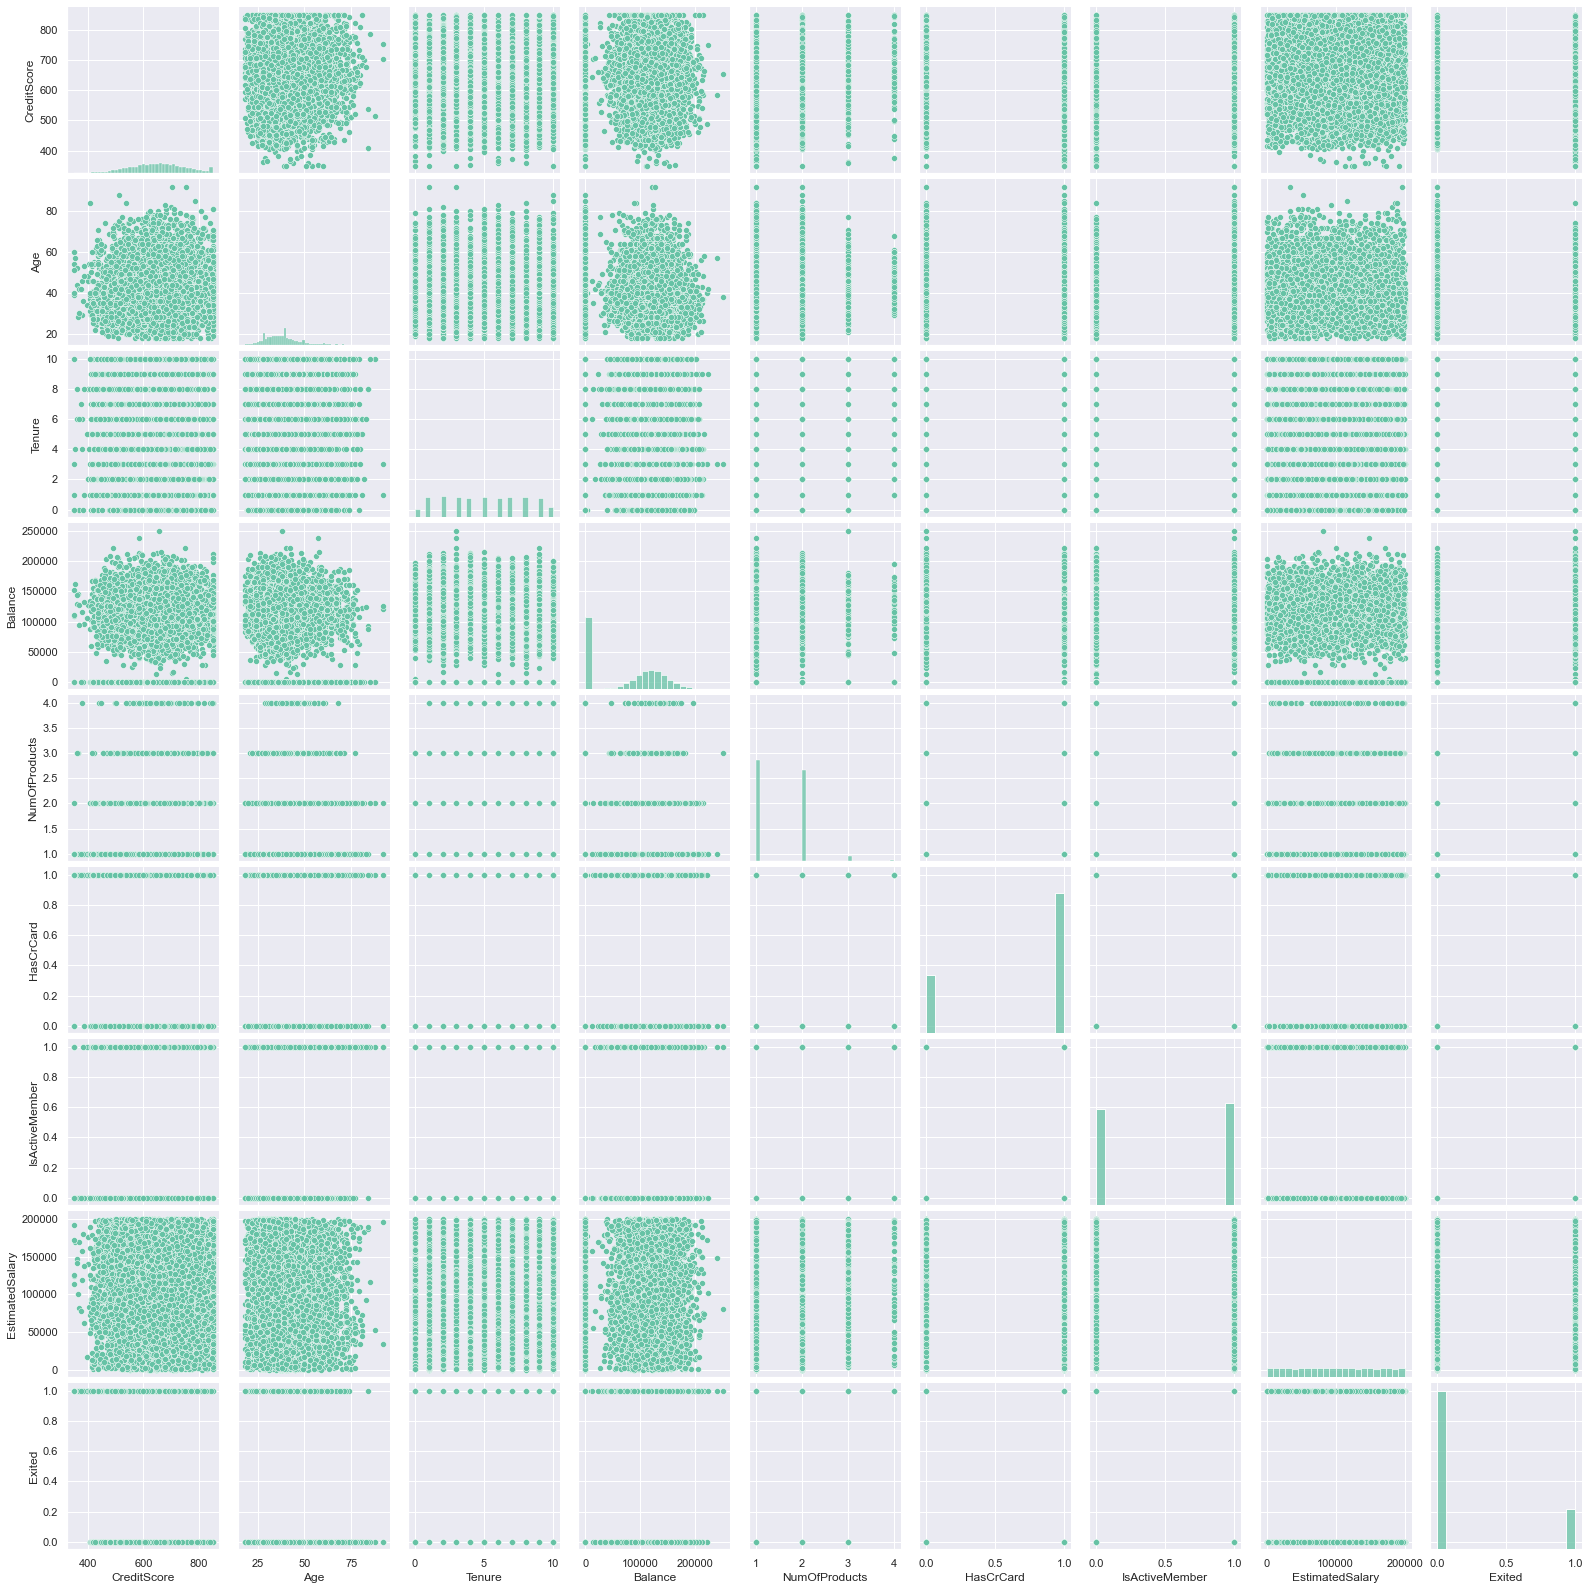

In [40]:
# Now let's see thhe whole scenerio in an one plot
sns.pairplot(data = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1))
plt.show()

In [41]:
# let's check the correlation
corr = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1).corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


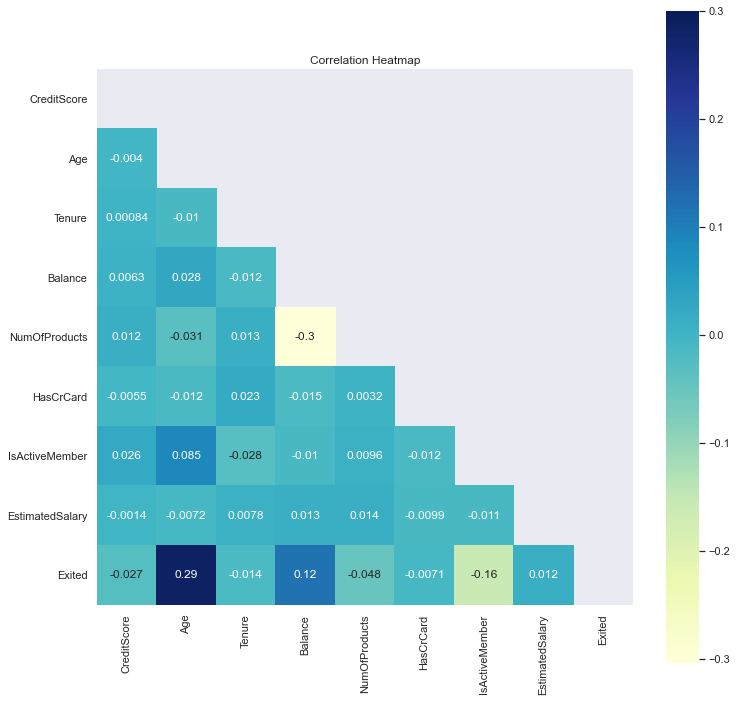

In [42]:
# Now let's visualize the correlation with the help of a heatmap
plt.figure(figsize=(12,12))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = corr, annot= True, cmap="YlGnBu", mask=mask, vmax=.3, square=True )
plt.title('Correlation Heatmap')
plt.show()

Feature 'Age' is 0.29% correlated with the exit or not.

Thus we've done the EDA part. Next I'll do Feature Engineering & Feature Selection.